# Data Collection and Scraping

Dataset Description

  1. Dataset: Property Listings in Kuala Lumpur
    
  2. Source: Kaggle
  
  3. URL: [Kaggle Property Listings in Kuala Lumpur](https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur)
  
  4. The dataset contains information about property listings in Kuala Lumpur, including features such as location, price, number of rooms, bathrooms, car parks, property type, size, and furnishing.
  
  5. The total number of rows of this dataset is 53883

## Import Data To Google Drive

In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your CSV file
file_path = '/content/drive/MyDrive/data_kaggle.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

Mounted at /content/drive


# Data Wrangling

To check types of available data, the summary of the data, missing values.

## Data Exploration

In [2]:
# Display the dataframe
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [3]:
# Display summary statistics
df.describe()

,Bathrooms,Car Parks
count,51870.000000,36316.000000
mean,3.073434,2.007848
std,1.631079,1.310427
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,2.000000
max,20.000000,30.000000


In [4]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [5]:
# Check for missing values
df.isnull().sum()

,0
Location,0
Price,248
Rooms,1706
Bathrooms,2013
Car Parks,17567
Property Type,25
Size,1063
Furnishing,6930


## Data Cleaning

In [6]:
# 'Car parks' column null value alone comprises of 31% percent of overall data. So, we decided to drop this column.

# Drop the 'Car Parks' column
df.drop('Car Parks', axis=1, inplace=True)

In [7]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Property Type  53858 non-null  object 
 5   Size           52820 non-null  object 
 6   Furnishing     46953 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.9+ MB


In [8]:
# Drop missing values
df.dropna(inplace=True)

In [9]:
# Drop duplicate value
df = df.drop_duplicates()

In [10]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40387 entries, 0 to 53881
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       40387 non-null  object 
 1   Price          40387 non-null  object 
 2   Rooms          40387 non-null  object 
 3   Bathrooms      40387 non-null  float64
 4   Property Type  40387 non-null  object 
 5   Size           40387 non-null  object 
 6   Furnishing     40387 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.5+ MB


In [11]:
# Display the first few rows of the cleaned dataframe
df.head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished


# Data Transformation

Prepare data according to format needed for further Machine Learning model prediction

## Data Transformation : Location

In [12]:
# Strip the Kuala Lumpur in 'Location' column

def strip_location(text):
    text = text.replace("Kuala Lumpur", "")
    text = text.replace(",", "")
    text = text.strip()
    return text # Return the cleaned text, not an integer

df["Location"] = df["Location"].apply(strip_location)

## Data Transformation : Price

In [13]:
# Extract only numerical value in 'Price' column
def strip_price(text):
    if isinstance(text, str):  # Check if the value is a string
        text = text.replace("RM", "")
        text = text.replace(",", "")
        text = text.strip()
        return int(text)
    elif isinstance(text, (int, float)):  # Handle numeric values
        return int(text)
    else:
        return None  # Handle other data types if needed

df["Price"] = df["Price"].apply(strip_price)

df = df[df['Price'] >= 100000]
df[df['Price'] < 100000]

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing


## Data Transformation : Rooms

In [14]:
# Split the 'Rooms' column
df[['Bedrooms', 'Store']] = df['Rooms'].str.split('+', expand=True)

# Drop the original 'Rooms' column
df.drop('Rooms', axis=1, inplace=True)

# To convert Rooms from object to numeric
df['Bedrooms'] = df['Bedrooms'].replace({'studio': 0, '20 Above': 20, 'Studio':0}).astype(int)
df.dropna()

# Replace null value in 'Store' with zero
df['Store'].fillna(0, inplace=True)

## Data Transformation : Property Type

In [15]:
# Standardize the type in Property Type
def strip_ptype(text):
    text = text.replace("Corner", "")
    text = text.replace("EndLot", "")
    text = text.replace("Intermediate", "")
    text = text.replace("Duplex", "")
    text = text.replace("Triplex", "")
    text = text.replace("Studio", "")
    text = text.replace("SOHO", "")
    text = text.replace("Penthouse", "")
    text = text.replace("()", "")
    text = text.strip()
    return text # Return the cleaned text, not an integer

df["Property Type"] = df["Property Type"].apply(strip_ptype)

## Data Transformation : Size (sqft)

In [16]:
# Select only the numerical value in Size column
import pandas as pd
import re

def extract_number(size_str):
    # Handle cases where size_str is not a string
    if not isinstance(size_str, str):
        return None

    match = re.search(r'\d+', size_str.replace(',', ''))
    return int(match.group()) if match else None

df['Size'] = df['Size'].apply(extract_number)

# Drop missing values in 'Size' column
df.dropna(subset=['Size'], inplace=True)

## Data Transformation : Price/Sqft

In [17]:
# Create new column comprises Price/Sqft for further ML model prediction process
df['Price/Sqft'] = df['Price'] / df['Size']

## Label Encoder

To transforms categorical variables into numerical values

In [18]:
#Encode categorical features
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
label_encoders = {}
for column in ['Location', 'Property Type', 'Furnishing']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Location,Price,Bathrooms,Property Type,Size,Furnishing,Bedrooms,Store,Price/Sqft
0,45,1250000,3.0,16,1335.0,0,2,1,936.329588
1,27,6800000,7.0,9,6900.0,1,6,0,985.507246
2,31,1030000,4.0,12,1875.0,1,3,0,549.333333
4,16,900000,3.0,12,1513.0,1,4,1,594.844679
5,85,5350000,5.0,9,7200.0,1,4,2,743.055556


## Re-Columns

In [19]:
# Rename columns
df = df.rename(columns={'Price': 'Price (RM)', 'Bedrooms': 'Rooms', 'Size': 'Size (sqft)'})

# Rearrange columns
df = df[['Location', 'Price (RM)', 'Rooms', 'Store', 'Bathrooms', 'Property Type', 'Size (sqft)', 'Furnishing', 'Price/Sqft']]

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Location,Price (RM),Rooms,Store,Bathrooms,Property Type,Size (sqft),Furnishing,Price/Sqft
0,45,1250000,2,1,3.0,16,1335.0,0,936.329588
1,27,6800000,6,0,7.0,9,6900.0,1,985.507246
2,31,1030000,3,0,4.0,12,1875.0,1,549.333333
4,16,900000,4,1,3.0,12,1513.0,1,594.844679
5,85,5350000,4,2,5.0,9,7200.0,1,743.055556


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40048 entries, 0 to 53881
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       40048 non-null  int64  
 1   Price (RM)     40048 non-null  int64  
 2   Rooms          40048 non-null  int64  
 3   Store          40048 non-null  object 
 4   Bathrooms      40048 non-null  float64
 5   Property Type  40048 non-null  int64  
 6   Size (sqft)    40048 non-null  float64
 7   Furnishing     40048 non-null  int64  
 8   Price/Sqft     40048 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 3.1+ MB


## Detecting Outliers

Outliers detected in Price (RM) using Z-Score method: 34
Outliers detected in Rooms using Z-Score method: 275
Outliers detected in Size (sqft) using Z-Score method: 52
Outliers detected in Price (RM) using IQR method: 3632
Outliers detected in Rooms using IQR method: 5583
Outliers detected in Size (sqft) using IQR method: 4161


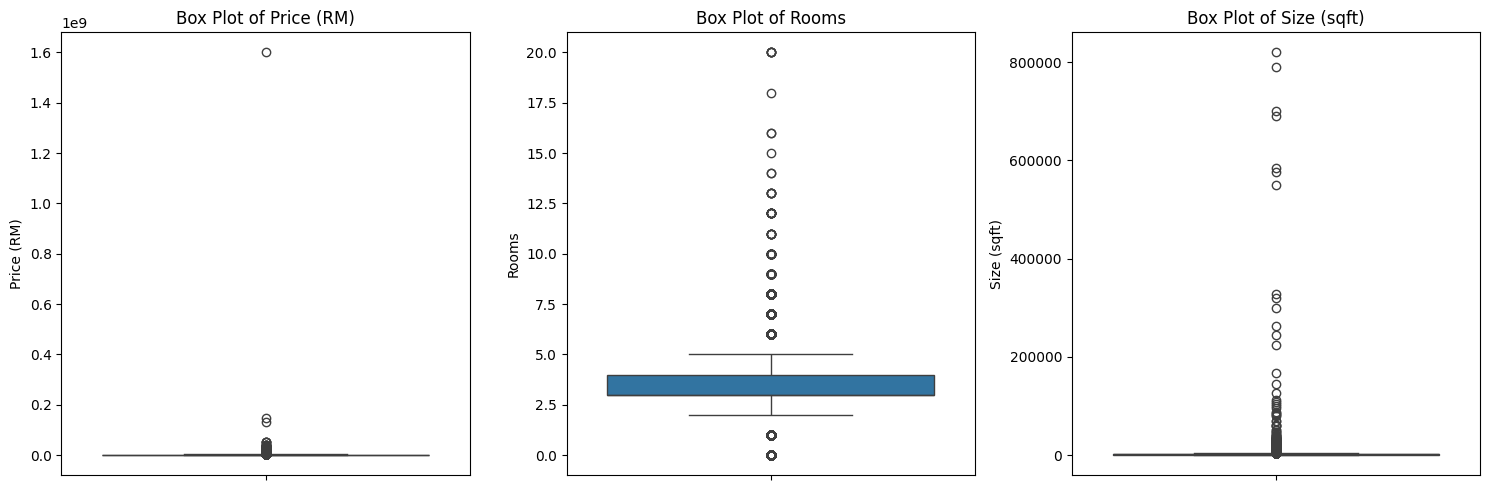

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Detect outliers using Z-Score
def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    return np.where(np.abs(z_scores) > threshold)

# Detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))

# Columns to check for outliers
numeric_columns = ['Price (RM)', 'Rooms', 'Size (sqft)']

# Z-Score method
for col in numeric_columns:
    outliers_zscore = detect_outliers_zscore(df[col].dropna())
    print(f'Outliers detected in {col} using Z-Score method: {len(outliers_zscore[0])}')

# IQR method
for col in numeric_columns:
    outliers_iqr = detect_outliers_iqr(df[col].dropna())
    print(f'Outliers detected in {col} using IQR method: {len(outliers_iqr[0])}')

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

## Remove Extreme Outliers

Outliers remaining in Price (RM) using Z-Score method: 0
Outliers remaining in Price (RM) using IQR method: 3463
Outliers remaining in Rooms using Z-Score method: 0
Outliers remaining in Rooms using IQR method: 0
Outliers remaining in Size (sqft) using Z-Score method: 0
Outliers remaining in Size (sqft) using IQR method: 0


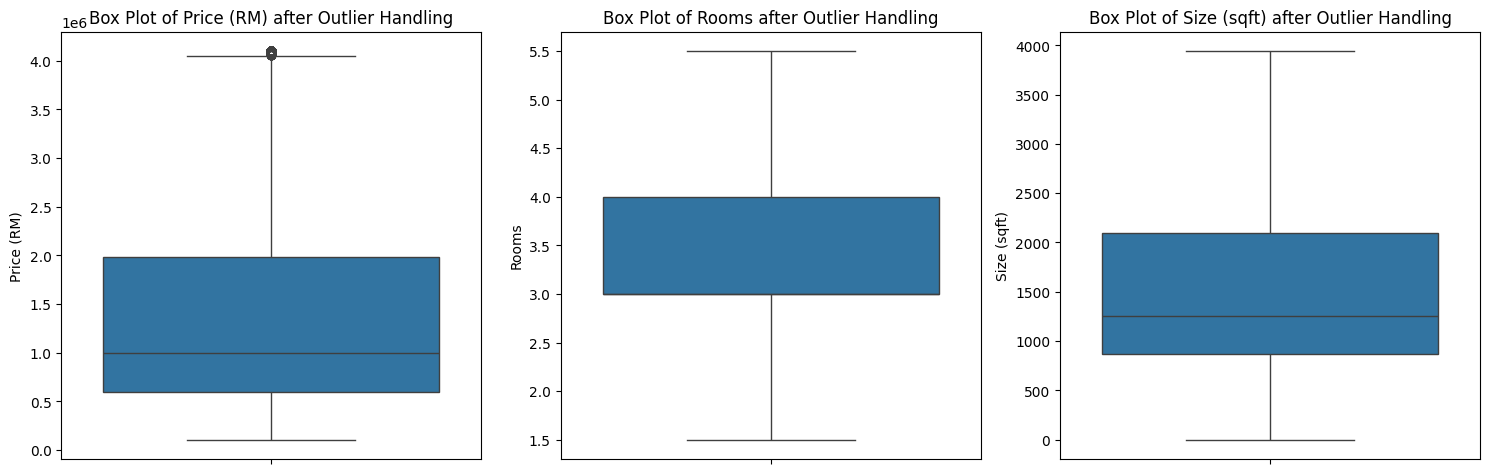

In [22]:
# Remove extreme outliers
def remove_extreme_outliers(df, col):
    outliers_zscore = set(detect_outliers_zscore(df[col].dropna())[0])
    outliers_iqr = set(detect_outliers_iqr(df[col].dropna())[0])
    extreme_outliers = outliers_zscore.intersection(outliers_iqr)
    return df.drop(index=df.iloc[list(extreme_outliers)].index)

# Cap remaining outliers to IQR bounds
def cap_outliers(df, col):
    Q1 = np.percentile(df[col].dropna(), 25)
    Q3 = np.percentile(df[col].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

for col in numeric_columns:
    df = remove_extreme_outliers(df, col)
    df = cap_outliers(df, col)

# Verify the changes
for col in numeric_columns:
    outliers_zscore = detect_outliers_zscore(df[col].dropna())
    outliers_iqr = detect_outliers_iqr(df[col].dropna())
    print(f'Outliers remaining in {col} using Z-Score method: {len(outliers_zscore[0])}')
    print(f'Outliers remaining in {col} using IQR method: {len(outliers_iqr[0])}')

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col} after Outlier Handling')
plt.tight_layout()
plt.show()

# Save the Cleaned Data

In [23]:
df.to_csv('/content/drive/My Drive/clean_data-kaggle.csv', index=False)


# Exploratory Data Analysis

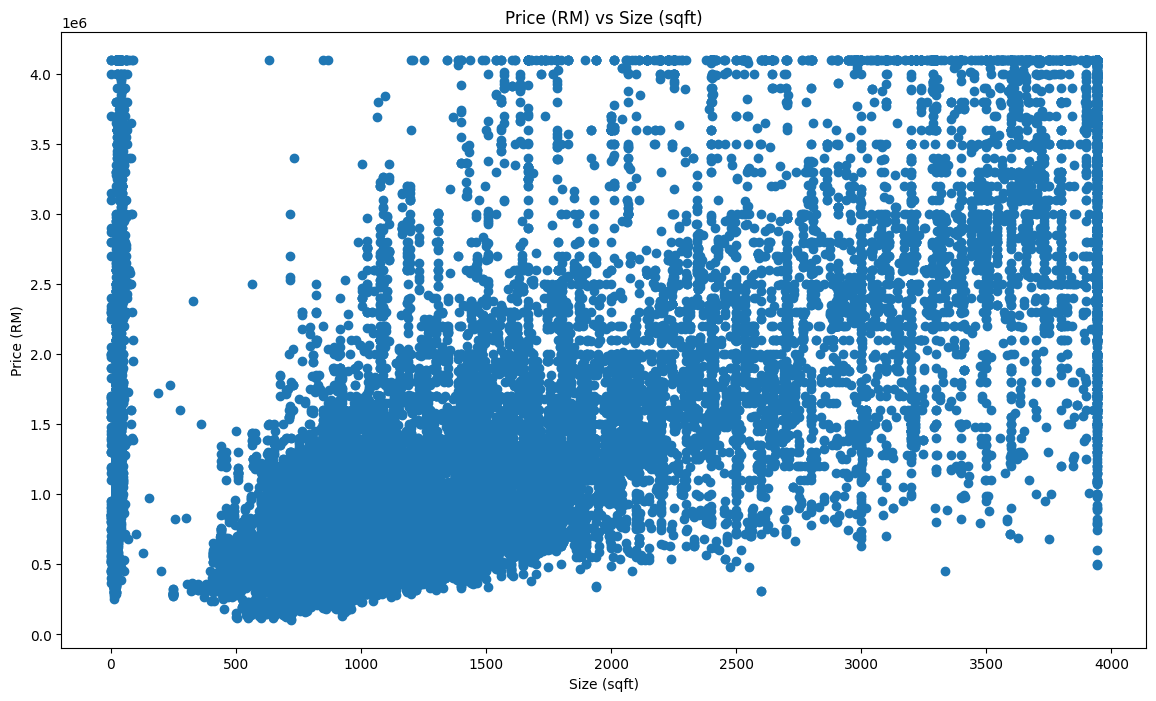

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(df['Size (sqft)'], df['Price (RM)'])  # Pass x and y values separately
plt.xlabel("Size (sqft)")
plt.ylabel("Price (RM)")
plt.title("Price (RM) vs Size (sqft)")
plt.show()

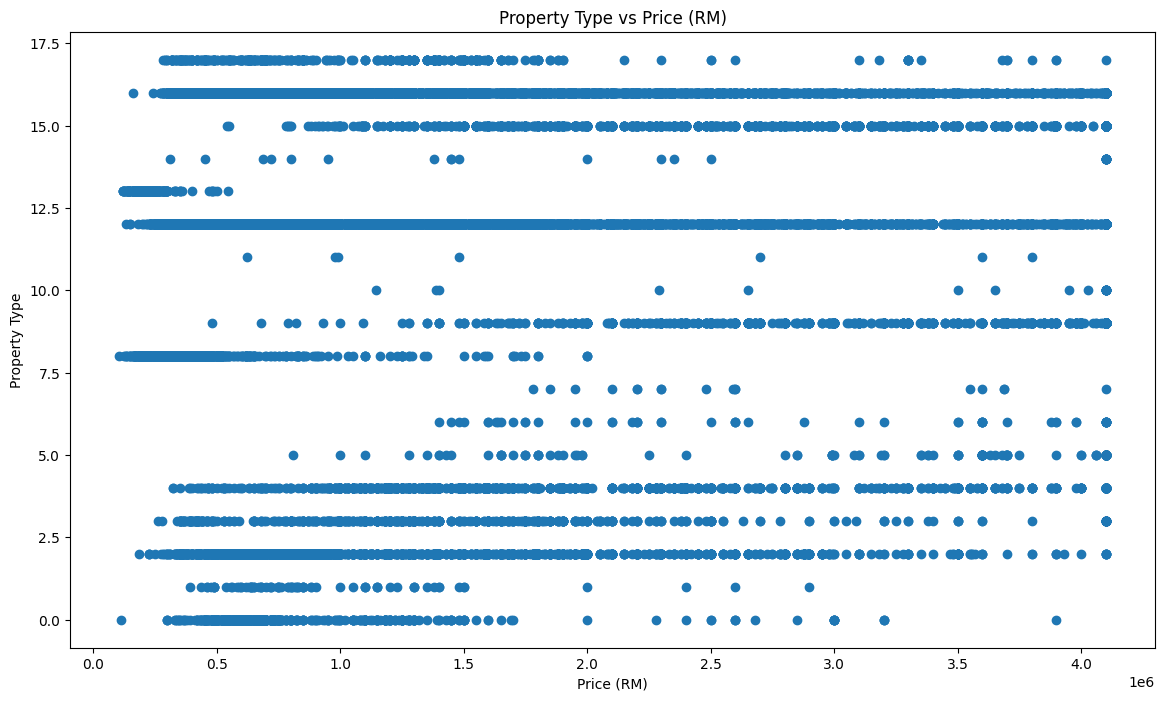

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(df['Price (RM)'], df['Property Type'])  # Pass x and y values separately
plt.xlabel("Price (RM)")
plt.ylabel("Property Type")
plt.title("Property Type vs Price (RM)")
plt.show()

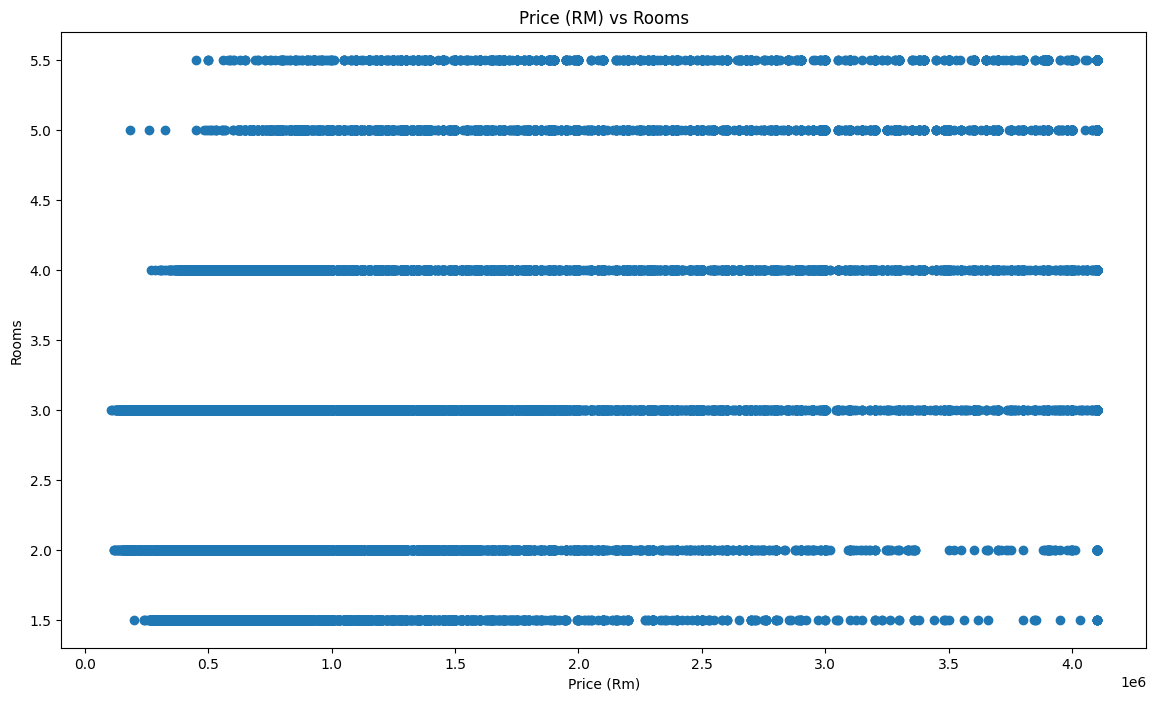

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(df['Price (RM)'], df['Rooms'])  # Pass x and y values separately
plt.xlabel("Price (Rm)")
plt.ylabel("Rooms")
plt.title("Price (RM) vs Rooms")
plt.show()

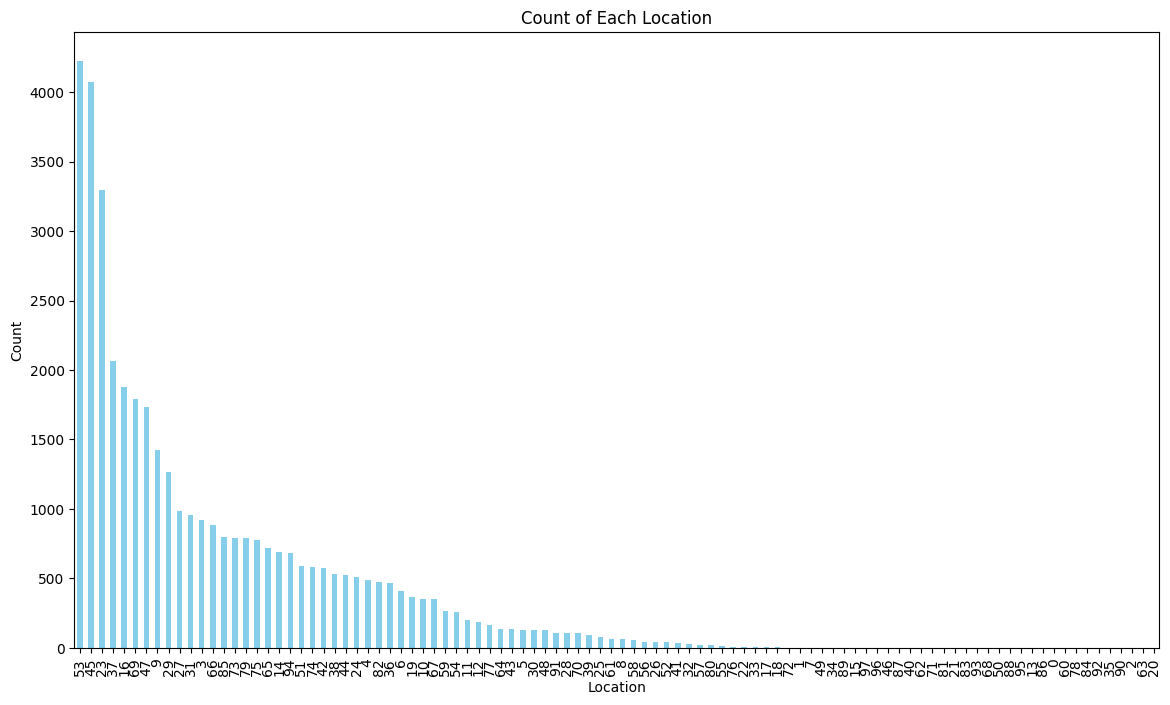

In [27]:
# Plot Location counts
location_counts = df['Location'].value_counts()
plt.figure(figsize=(14, 8))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()
